In [75]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [80]:
# directory for the small subset of audio files

# small_audio = os.environ.get('fma_small/fma_small')
small_audio = 'fma_small/fma_small'

In [113]:
def get_trackID_from_dir(audio_dir):
    track_ids = []
    for _, dir_name, files in os.walk(audio_dir):
        if dir_name == []:
            track_ids.extend(int(file[:-4]) for file in files)
            # print(dir_name, files)
    return track_ids

In [114]:
get_trackID_from_dir(small_audio)

[] ['000002.mp3', '000005.mp3', '000010.mp3', '000140.mp3', '000141.mp3', '000148.mp3', '000182.mp3', '000190.mp3', '000193.mp3', '000194.mp3', '000197.mp3', '000200.mp3', '000203.mp3', '000204.mp3', '000207.mp3', '000210.mp3', '000211.mp3', '000212.mp3', '000213.mp3', '000255.mp3', '000256.mp3', '000368.mp3', '000424.mp3', '000459.mp3', '000534.mp3', '000540.mp3', '000546.mp3', '000574.mp3', '000602.mp3', '000615.mp3', '000620.mp3', '000621.mp3', '000625.mp3', '000666.mp3', '000667.mp3', '000676.mp3', '000690.mp3', '000694.mp3', '000695.mp3', '000704.mp3', '000705.mp3', '000706.mp3', '000707.mp3', '000708.mp3', '000709.mp3', '000714.mp3', '000715.mp3', '000716.mp3', '000718.mp3', '000777.mp3', '000814.mp3', '000821.mp3', '000822.mp3', '000825.mp3', '000853.mp3', '000890.mp3', '000892.mp3', '000897.mp3', '000993.mp3', '000995.mp3', '000997.mp3', '000998.mp3']
[] ['001039.mp3', '001040.mp3', '001066.mp3', '001069.mp3', '001073.mp3', '001075.mp3', '001082.mp3', '001083.mp3', '001087.mp3'

[2,
 5,
 10,
 140,
 141,
 148,
 182,
 190,
 193,
 194,
 197,
 200,
 203,
 204,
 207,
 210,
 211,
 212,
 213,
 255,
 256,
 368,
 424,
 459,
 534,
 540,
 546,
 574,
 602,
 615,
 620,
 621,
 625,
 666,
 667,
 676,
 690,
 694,
 695,
 704,
 705,
 706,
 707,
 708,
 709,
 714,
 715,
 716,
 718,
 777,
 814,
 821,
 822,
 825,
 853,
 890,
 892,
 897,
 993,
 995,
 997,
 998,
 1039,
 1040,
 1066,
 1069,
 1073,
 1075,
 1082,
 1083,
 1087,
 1102,
 1193,
 1195,
 1196,
 1197,
 1249,
 1259,
 1270,
 1276,
 1277,
 1278,
 1417,
 1427,
 1443,
 1482,
 1510,
 1544,
 1642,
 1644,
 1649,
 1661,
 1663,
 1666,
 1673,
 1680,
 1681,
 1682,
 1683,
 1684,
 1685,
 1686,
 1687,
 1688,
 1689,
 1701,
 1702,
 1703,
 1704,
 1706,
 1720,
 1732,
 1733,
 1735,
 1736,
 1883,
 1891,
 1893,
 1924,
 1925,
 1929,
 1930,
 2012,
 2096,
 2097,
 2099,
 3263,
 3264,
 3265,
 3266,
 3270,
 3271,
 3272,
 3273,
 3274,
 3492,
 3532,
 3533,
 3534,
 3535,
 3537,
 3538,
 3573,
 3598,
 3624,
 3707,
 3708,
 3720,
 3721,
 3722,
 3724,
 3725,
 37

In [146]:
# ex: fma_small/fma_small/000002.mp3

def get_audio_path(audio_dir, tid):
    track_id_name = '{:6d}'.format(tid)
    print(audio_dir, track_id_name[:3], track_id_name)
    return os.path.join(audio_dir, track_id_name[:3], track_id_name + '.mp3')

In [145]:
# issue with first folder '000', doesn't print 000, so path is incomplete


get_audio_path(small_audio, 2)

fma_small/fma_small          2


'fma_small/fma_small\\   \\     2.mp3'

In [141]:
# issue with folder, should be '001' not '1', won't plot

get_audio_path(small_audio, 1039)

fma_small/fma_small   1   1039


'fma_small/fma_small\\  1\\  1039.mp3'

In [152]:
# issues with folder, should be '099' not '99', won't plot

get_audio_path(small_audio, 99041)

fma_small/fma_small  99  99041


'fma_small/fma_small\\ 99\\ 99041.mp3'

In [153]:
get_audio_path(small_audio, 100478)

fma_small/fma_small 100 100478


'fma_small/fma_small\\100\\100478.mp3'

In [136]:
get_audio_path(small_audio, 155066)

fma_small/fma_small 155 155066


'fma_small/fma_small\\155\\155066.mp3'

In [83]:
# check/confirm that there are 8000 tracks in the small subset
# audio_dir = 'fma_small/fma_small'
track_ids = get_trackID_from_dir(small_audio)
print(len(track_ids))

8000


In [53]:
def create_melSpect(tid):
    filename = get_audio_path(small_audio, tid)
    y, sr = librosa.load(filename)
    spect = librosa.feature.melspectrogram(y = y, sr = sr, n_fft = 2048, hop_length = 1024)
    spect = librosa.power_to_db(spect, ref = np.max)
    return spect

In [66]:
def plot_melSpect(tid):
    spect = create_melSpect(tid)
    print(spect.shape)
    plt.figure(figsize = (10, 4))
    librosa.display.specshow(spect.T, y_axis = 'mel', fmax = 8000, x_axis = 'time')
    plt.colorbar(format = '%+2.0f dB')
    plt.show()

fma_small/fma_small 155 155066
(646, 128)


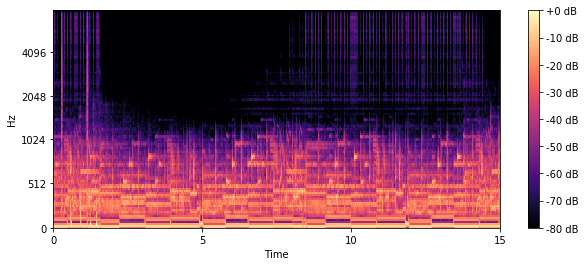

In [147]:
plot_melSpect(155066)

In [148]:
plot_melSpect(2)

fma_small/fma_small          2


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\swluk\\Documents\\CCNY\\Spring2020\\CSCI1910_NNTensorFlow\\Project\\fma_small\\fma_small\\   \\     2.mp3'